<a href="https://colab.research.google.com/github/Sreyas2403/StockAnalysis_Patterns-Indicators/blob/main/may31_assign9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nsepython

In [ ]:
from nsepython import *
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=11b29755433461115f526383bf431797c7c065c825ee7617c1491185ef5e751d
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=aeb6dd1db3803fb65425a34713d1dfba56e5cb47bd64c82fa4046a0b45d4ce2c
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
symbol = input("Enter the symbol: ")
series = "EQ"
start_date = input("Enter the start date (dd-mm-yyyy): ")
end_date = input("Enter the end date (dd-mm-yyyy): ")
equity_data = equity_history(symbol, series, start_date, end_date)
print(equity_data)

Enter the symbol: SBIN
Enter the start date (dd-mm-yyyy): 01-01-2023
Enter the end date (dd-mm-yyyy): 31-12-2023
                          _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
0    658c11def964ff32e77dc404      SBIN        EQ              N   
1    658d635bfc7c264717dac3d9      SBIN        EQ              N   
2    658eb4febc28d99b03074c99      SBIN        EQ              N   
3    655755feba15dff83b493e2e      SBIN        EQ              N   
4    655b4a7f7fbd5396f6225acb      SBIN        EQ              N   
..                        ...       ...       ...            ...   
247  63e0ebfee9486e000641a74e      SBIN        EQ              N   
248  63e23d7e9029740006c92280      SBIN        EQ              N   
249  63e38edb77e63d0007d9b91b      SBIN        EQ              N   
250  63e4e0621df6cc0007b3d3dd      SBIN        EQ              N   
251  642835e7faf76300072ef1db      SBIN        EQ              N   

     CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
0   

In [ ]:
from nsepython import nsefetch
import pandas as pd
from datetime import datetime, timedelta

def fetch_intraday_data(symbol, interval, days):
    # Define the start and end dates
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)

    # Create date ranges
    date_ranges = pd.date_range(start=start_date, end=end_date, freq=f'{interval}T')

    # Fetch data and store in a list
    data_list = []
    for i in range(len(date_ranges) - 1):
        from_date = date_ranges[i]
        to_date = date_ranges[i + 1]
        from_timestamp = int(from_date.timestamp())
        to_timestamp = int(to_date.timestamp())

        url = f"https://www.nseindia.com/api/quote-equity?symbol={symbol}&series=[%22{series}%22]&from={from_timestamp}&to={to_timestamp}&interval={interval}m"
        data = nsefetch(url)

        if data:
            for entry in data['data']:
                data_list.append(entry)

    # Convert list to DataFrame
    df = pd.DataFrame(data_list)
    return df

def save_data_to_csv(df, filename):
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Input symbol
symbol = input("Enter the symbol: ").upper()

# Define the timeframes and number of days
timeframes = [15, 75, 125]
days = 59

# Fetch and save data for each timeframe
for timeframe in timeframes:
    df = fetch_intraday_data(symbol, timeframe, days)
    filename = f"{symbol}_{timeframe}min.csv"
    save_data_to_csv(df, filename)


ModuleNotFoundError: No module named 'nsepython'

In [ ]:
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import datetime
import pandas_ta as ta

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nse.equity_history(symbol, series, start_date, end_date)
    equity_df = pd.DataFrame(equity_data)
    equity_df['mTIMESTAMP'] = pd.to_datetime(equity_df['mTIMESTAMP'])
    equity_df = equity_df.set_index('mTIMESTAMP')
    equity_df = equity_df.sort_index()
    equity_df[['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']] = equity_df[
        ['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']].apply(pd.to_numeric, errors='coerce')
    equity_df = equity_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY'])
    return equity_df

# Function to calculate RSI
def calculate_rsi(data, length=14):
    equity_data['RSI'] = ta.rsi(equity_data['CH_CLOSING_PRICE'], length=14)
    return equity_data['RSI']

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to calculate weekly data
def calculate_weekly_data(equity_df):
    weekly_df = equity_df.resample('W').agg({
        'CH_OPENING_PRICE': 'first',
        'CH_TRADE_HIGH_PRICE': 'max',
        'CH_TRADE_LOW_PRICE': 'min',
        'CH_CLOSING_PRICE': 'last',
        'CH_TOT_TRADED_QTY': 'sum'
    })
    weekly_df['RSI'] = ta.rsi(weekly_df['CH_CLOSING_PRICE'])
    weekly_df['MACD'], weekly_df['Signal_Line'] = calculate_macd(weekly_df['CH_CLOSING_PRICE'])
    return weekly_df

# Function to save data to Excel
def save_to_excel(writer, daily_df, weekly_df, symbol, duration):
    daily_sheet_name = f'{symbol}_Daily_{duration}'
    weekly_sheet_name = f'{symbol}_Weekly_{duration}'

    daily_df.to_excel(writer, sheet_name=daily_sheet_name)
    weekly_df.to_excel(writer, sheet_name=weekly_sheet_name)

# Main function
def main():
    excel_file = input("Enter the Excel file path: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter the start date (dd-mm-yyyy): ")
    end_date = input("Enter the end date (dd-mm-yyyy): ")
    duration = int(input("Enter the duration (N): "))

    with pd.ExcelWriter(f'Stock_Symbols_N_Period_Profile_{duration}.xlsx') as writer:
        for symbol in stock_symbols:
            equity_df = fetch_equity_data(symbol, "EQ", start_date, end_date)

            # Calculate RSI and MACD for daily data
            equity_df['RSI'] = calculate_rsi(equity_df['CH_CLOSING_PRICE'])
            equity_df['MACD'], equity_df['Signal_Line'] = calculate_macd(equity_df['CH_CLOSING_PRICE'])

            # Remove duplicates based on index (mTIMESTAMP)
            equity_df = equity_df[~equity_df.index.duplicated(keep='first')]

            # Get last N days and N weeks data
            daily_df = equity_df.tail(duration)
            weekly_df = calculate_weekly_data(equity_df).tail(duration)

            # Remove duplicates from weekly data
            weekly_df = weekly_df[~weekly_df.index.duplicated(keep='first')]

            # Save to Excel
            save_to_excel(writer, daily_df, weekly_df, symbol, duration)

    print(f'Results saved to Stock_Symbols_N_Period_Profile_{duration}.xlsx')

if __name__ == "__main__":
    main()


Enter the Excel file path: /content/Stocks.xlsx
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
Enter the duration (N): 104
Results saved to Stock_Symbols_N_Period_Profile_104.xlsx


Enter the symbol: SBIN
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
Enter the duration (N): 104


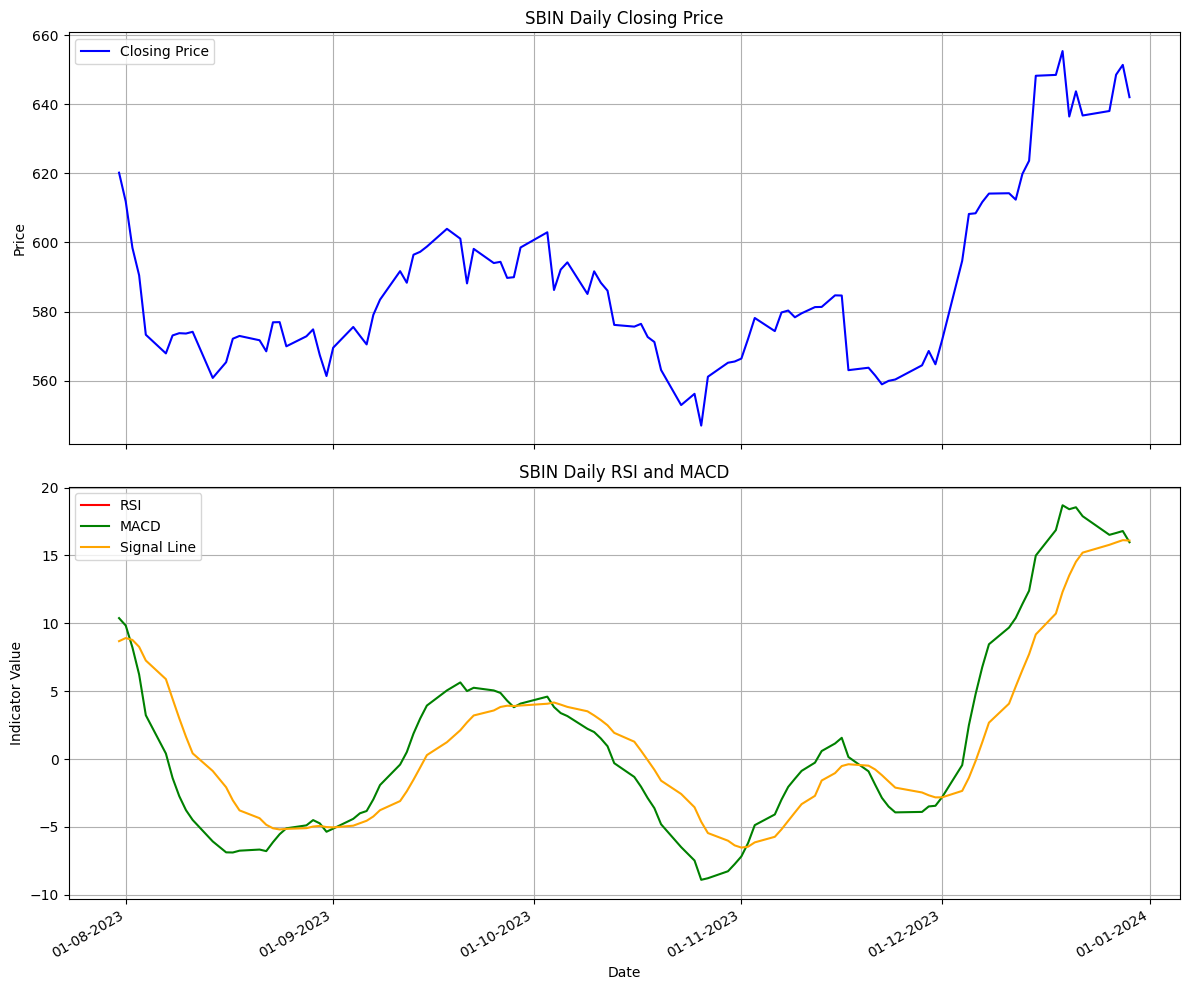

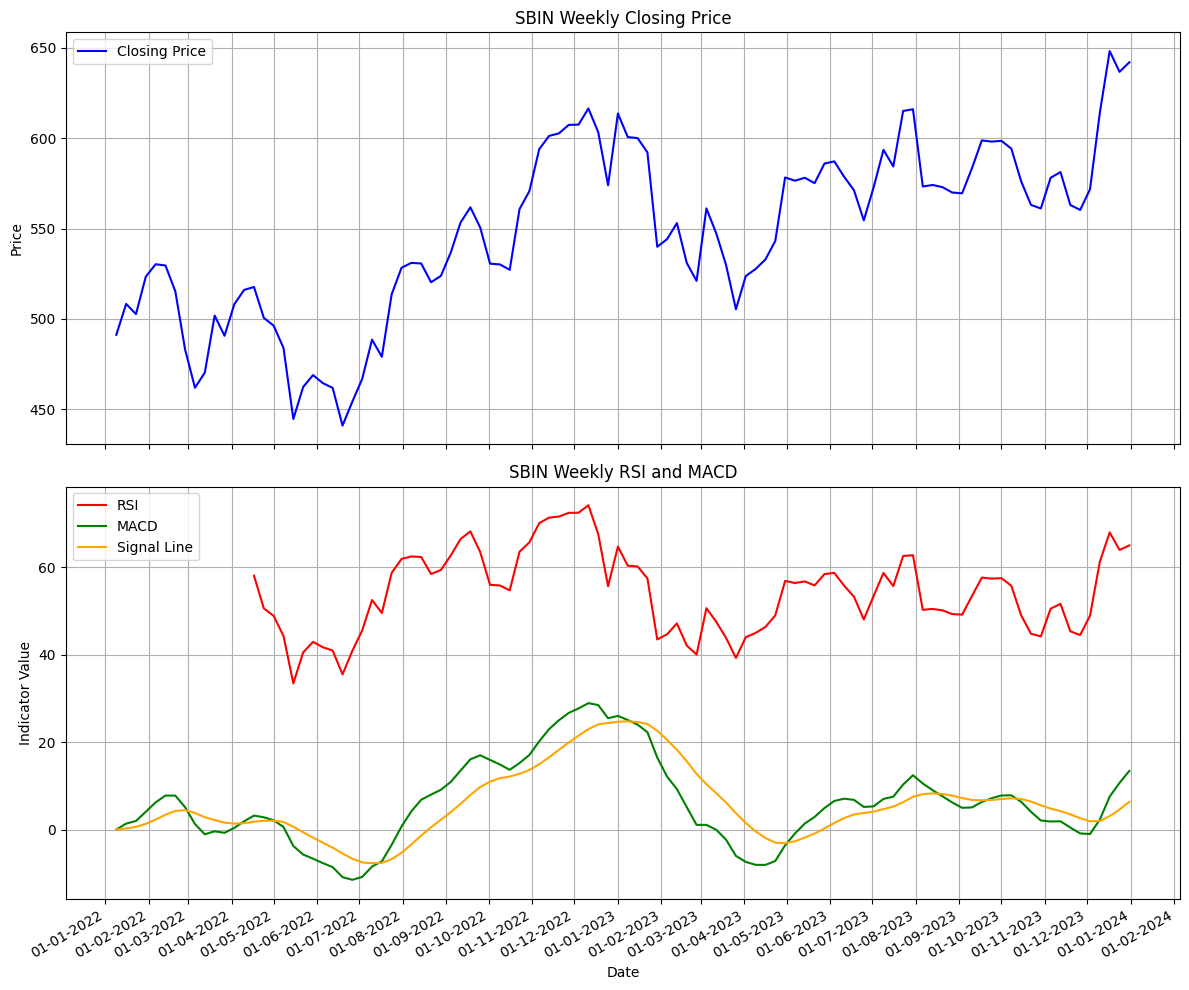

Plots saved to SBIN_N_Period_Profile_104.pdf


In [ ]:
# 2b
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import datetime
import pandas_ta as ta

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nse.equity_history(symbol, series, start_date, end_date)
    equity_df = pd.DataFrame(equity_data)
    equity_df['mTIMESTAMP'] = pd.to_datetime(equity_df['mTIMESTAMP'])
    equity_df = equity_df.set_index('mTIMESTAMP')
    equity_df = equity_df.sort_index()
    equity_df[['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']] = equity_df[
        ['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']].apply(pd.to_numeric, errors='coerce')
    equity_df = equity_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY'])
    return equity_df

# Function to calculate RSI
def calculate_rsi(data, length=14):
    equity_data['RSI'] = ta.rsi(equity_data['CH_CLOSING_PRICE'], length=14)
    return equity_data['RSI']

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to calculate weekly data
def calculate_weekly_data(equity_df):
    weekly_df = equity_df.resample('W').agg({
        'CH_OPENING_PRICE': 'first',
        'CH_TRADE_HIGH_PRICE': 'max',
        'CH_TRADE_LOW_PRICE': 'min',
        'CH_CLOSING_PRICE': 'last',
        'CH_TOT_TRADED_QTY': 'sum'
    })
    weekly_df['RSI'] = ta.rsi(weekly_df['CH_CLOSING_PRICE'])
    weekly_df['MACD'], weekly_df['Signal_Line'] = calculate_macd(weekly_df['CH_CLOSING_PRICE'])
    return weekly_df

# Function to save plots to PDF
def save_plots_to_pdf(daily_df, weekly_df, symbol, duration):
    with PdfPages(f'{symbol}_N_Period_Profile_{duration}.pdf') as pdf:
        # Plot daily data
        fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        ax[0].plot(daily_df.index, daily_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
        ax[0].set_title(f'{symbol} Daily Closing Price')
        ax[0].set_ylabel('Price')
        ax[0].legend()
        ax[0].grid()

        ax[1].plot(daily_df.index, daily_df['RSI'], label='RSI', color='red')
        ax[1].plot(daily_df.index, daily_df['MACD'], label='MACD', color='green')
        ax[1].plot(daily_df.index, daily_df['Signal_Line'], label='Signal Line', color='orange')
        ax[1].set_title(f'{symbol} Daily RSI and MACD')
        ax[1].set_xlabel('Date')
        ax[1].set_ylabel('Indicator Value')
        ax[1].legend()
        ax[1].grid()
        # Formatting the dates
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        plt.gcf().autofmt_xdate()

        plt.tight_layout()
        plt.show()
        pdf.savefig(fig)
        plt.close()

        # Plot weekly data
        fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        ax[0].plot(weekly_df.index, weekly_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
        ax[0].set_title(f'{symbol} Weekly Closing Price')
        ax[0].set_ylabel('Price')
        ax[0].legend()
        ax[0].grid()

        ax[1].plot(weekly_df.index, weekly_df['RSI'], label='RSI', color='red')
        ax[1].plot(weekly_df.index, weekly_df['MACD'], label='MACD', color='green')
        ax[1].plot(weekly_df.index, weekly_df['Signal_Line'], label='Signal Line', color='orange')
        ax[1].set_title(f'{symbol} Weekly RSI and MACD')
        ax[1].set_xlabel('Date')
        ax[1].set_ylabel('Indicator Value')
        ax[1].legend()
        ax[1].grid()
        # Formatting the dates
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        plt.gcf().autofmt_xdate()

        plt.tight_layout()
        plt.show()
        pdf.savefig(fig)
        plt.close()


# Main function
def main():
    symbol = input("Enter the symbol: ")
    series = "EQ"
    start_date = input("Enter the start date (dd-mm-yyyy): ")
    end_date = input("Enter the end date (dd-mm-yyyy): ")
    duration = int(input("Enter the duration (N): "))

    equity_df = fetch_equity_data(symbol, series, start_date, end_date)

    # Calculate RSI and MACD for daily data
    equity_df['RSI'] = calculate_rsi(equity_df['CH_CLOSING_PRICE'])
    equity_df['MACD'], equity_df['Signal_Line'] = calculate_macd(equity_df['CH_CLOSING_PRICE'])

    # Remove duplicates based on index (mTIMESTAMP)
    equity_df = equity_df[~equity_df.index.duplicated(keep='first')]

    # Get last N days and N weeks data
    daily_df = equity_df.tail(duration)
    weekly_df = calculate_weekly_data(equity_df).tail(duration)

    # Remove duplicates from weekly data
    weekly_df = weekly_df[~weekly_df.index.duplicated(keep='first')]

    # Save plots to PDF
    save_plots_to_pdf(daily_df, weekly_df, symbol, duration)

    print(f'Plots saved to {symbol}_N_Period_Profile_{duration}.pdf')

if __name__ == "__main__":
    main()


In [ ]:
#3. a) multiple stocks
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas_ta as ta

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nse.equity_history(symbol, series, start_date, end_date)
    equity_df = pd.DataFrame(equity_data)
    equity_df['mTIMESTAMP'] = pd.to_datetime(equity_df['mTIMESTAMP'])
    equity_df = equity_df.set_index('mTIMESTAMP')
    equity_df = equity_df.sort_index()
    equity_df[['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']] = equity_df[
        ['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']].apply(pd.to_numeric, errors='coerce')
    equity_df = equity_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY'])
    return equity_df

# Function to calculate RSI
def calculate_rsi(data, length=14):
    equity_data['RSI'] = ta.rsi(equity_data['CH_CLOSING_PRICE'], length=14)
    return equity_data['RSI']

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to calculate weekly data
def calculate_weekly_data(equity_df):
    weekly_df = equity_df.resample('W').agg({
        'CH_OPENING_PRICE': 'first',
        'CH_TRADE_HIGH_PRICE': 'max',
        'CH_TRADE_LOW_PRICE': 'min',
        'CH_CLOSING_PRICE': 'last',
        'CH_TOT_TRADED_QTY': 'sum'
    })
    weekly_df['RSI'] = ta.rsi(weekly_df['CH_CLOSING_PRICE'])
    weekly_df['MACD'], weekly_df['Signal_Line'] = calculate_macd(weekly_df['CH_CLOSING_PRICE'])
    return weekly_df

# Function to save data to Excel
def save_to_excel(daily_df, weekly_df, symbol, duration):
    with pd.ExcelWriter(f'{symbol}_N_Period_Profile_{duration}.xlsx') as writer:
        daily_df.to_excel(writer, sheet_name='Daily Data')
        weekly_df.to_excel(writer, sheet_name='Weekly Data')

# Main function
def main():
    excel_file = input("Enter the Excel file path: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()
    series = "EQ"
    start_date = input("Enter the start date (dd-mm-yyyy): ")
    end_date = input("Enter the end date (dd-mm-yyyy): ")
    duration = int(input("Enter the duration (N): "))

    for symbol in stock_symbols:
        equity_df = fetch_equity_data(symbol, "EQ", start_date, end_date)


    # Calculate RSI and MACD for daily data
    equity_df['RSI'] = calculate_rsi(equity_df['CH_CLOSING_PRICE'])
    equity_df['MACD'], equity_df['Signal_Line'] = calculate_macd(equity_df['CH_CLOSING_PRICE'])

    # Remove duplicates based on index (mTIMESTAMP)
    equity_df = equity_df[~equity_df.index.duplicated(keep='first')]

    # Get last N days and N weeks data
    daily_df = equity_df.tail(duration)
    weekly_df = calculate_weekly_data(equity_df).tail(duration)

    # Remove duplicates from weekly data
    weekly_df = weekly_df[~weekly_df.index.duplicated(keep='first')]


    # Save to Excel
    save_to_excel(daily_df, weekly_df, symbol, duration)

    print(f'Results saved to {symbol}_N_Period_Profile_{duration}.xlsx')

if __name__ == "__main__":
    main()


Enter the Excel file path: /content/Stocks.xlsx
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
Enter the duration (N): 104
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_

Enter the Excel file path: /content/Stocks.xlsx
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
Enter the duration (N): 104
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_

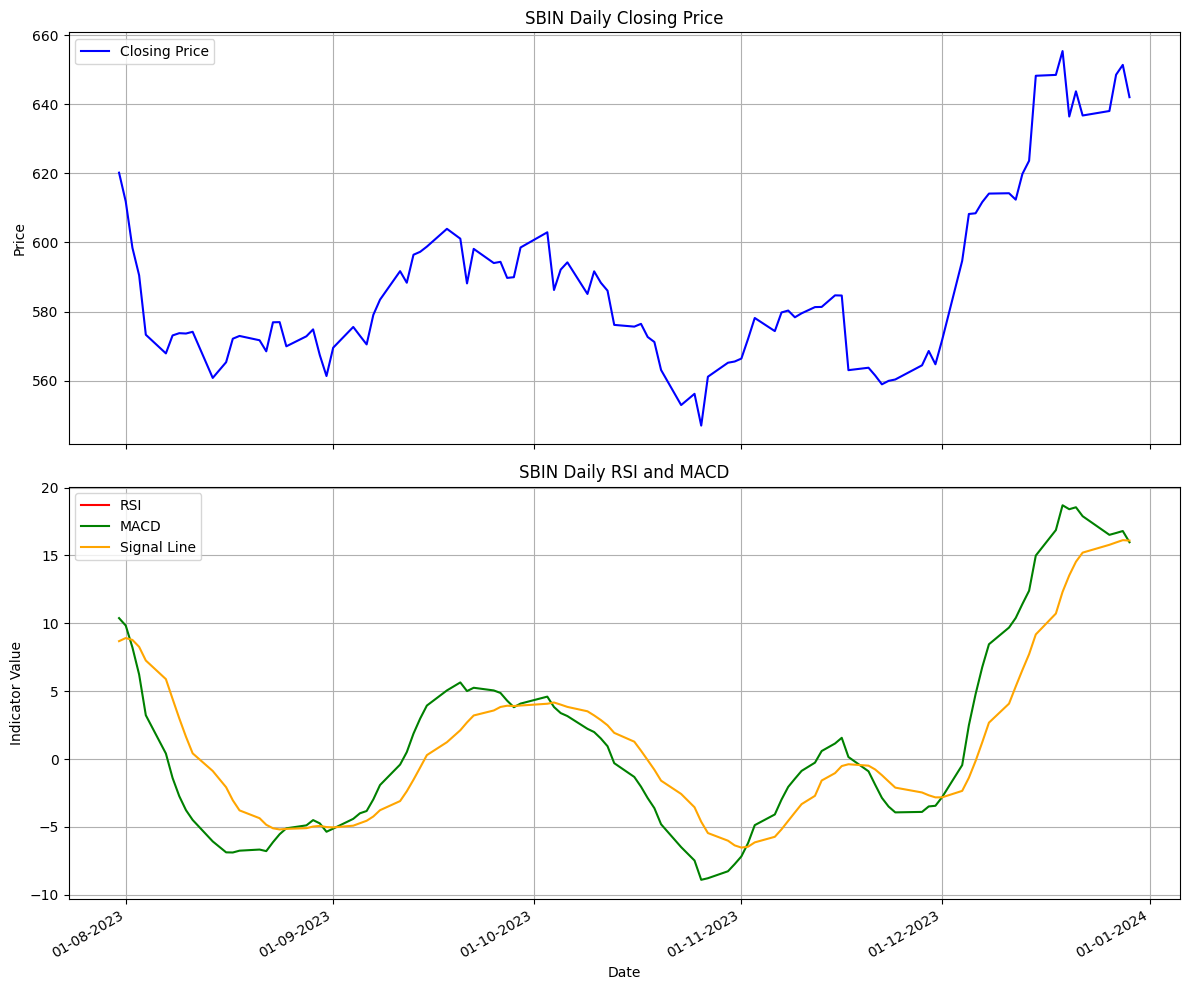

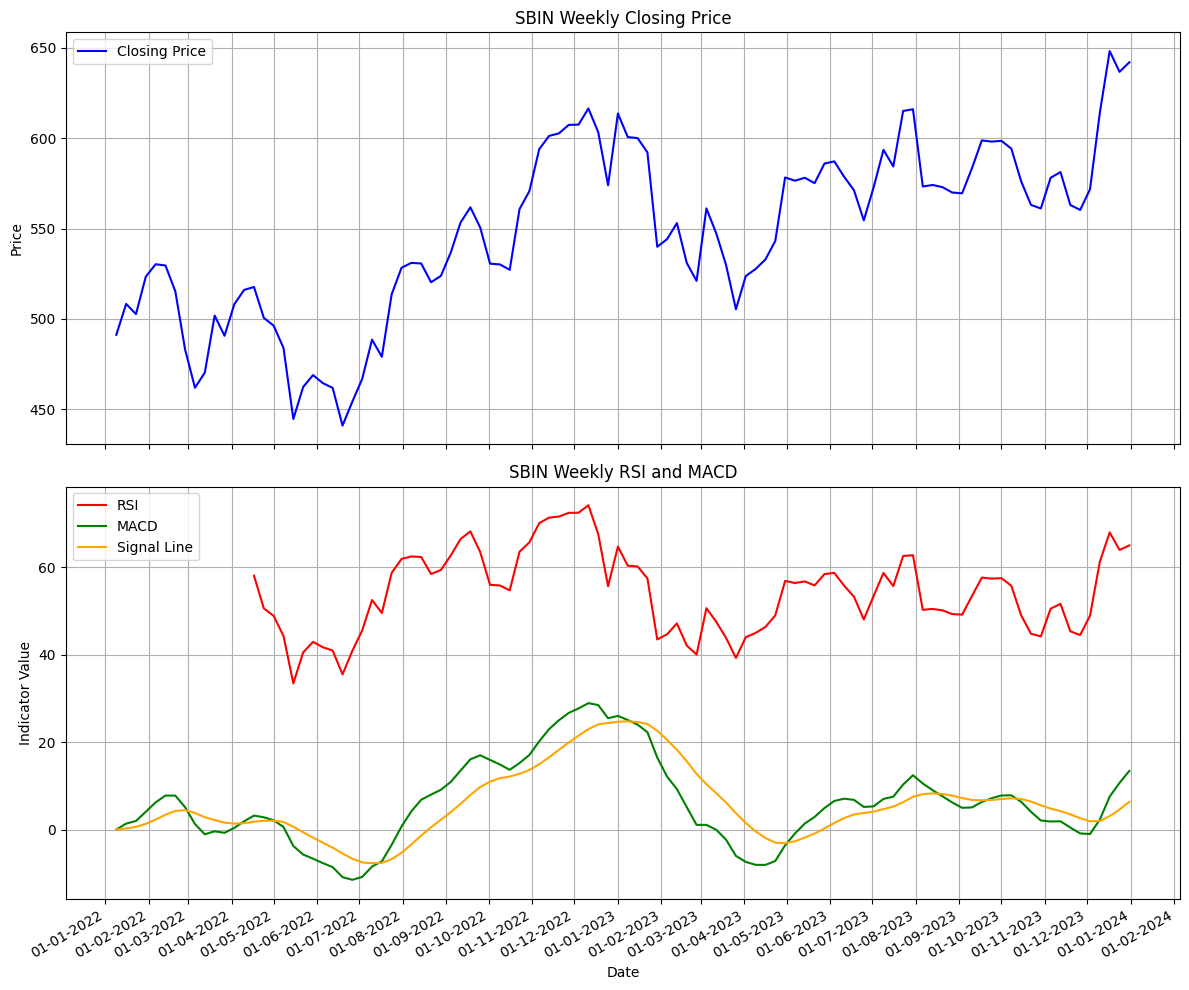

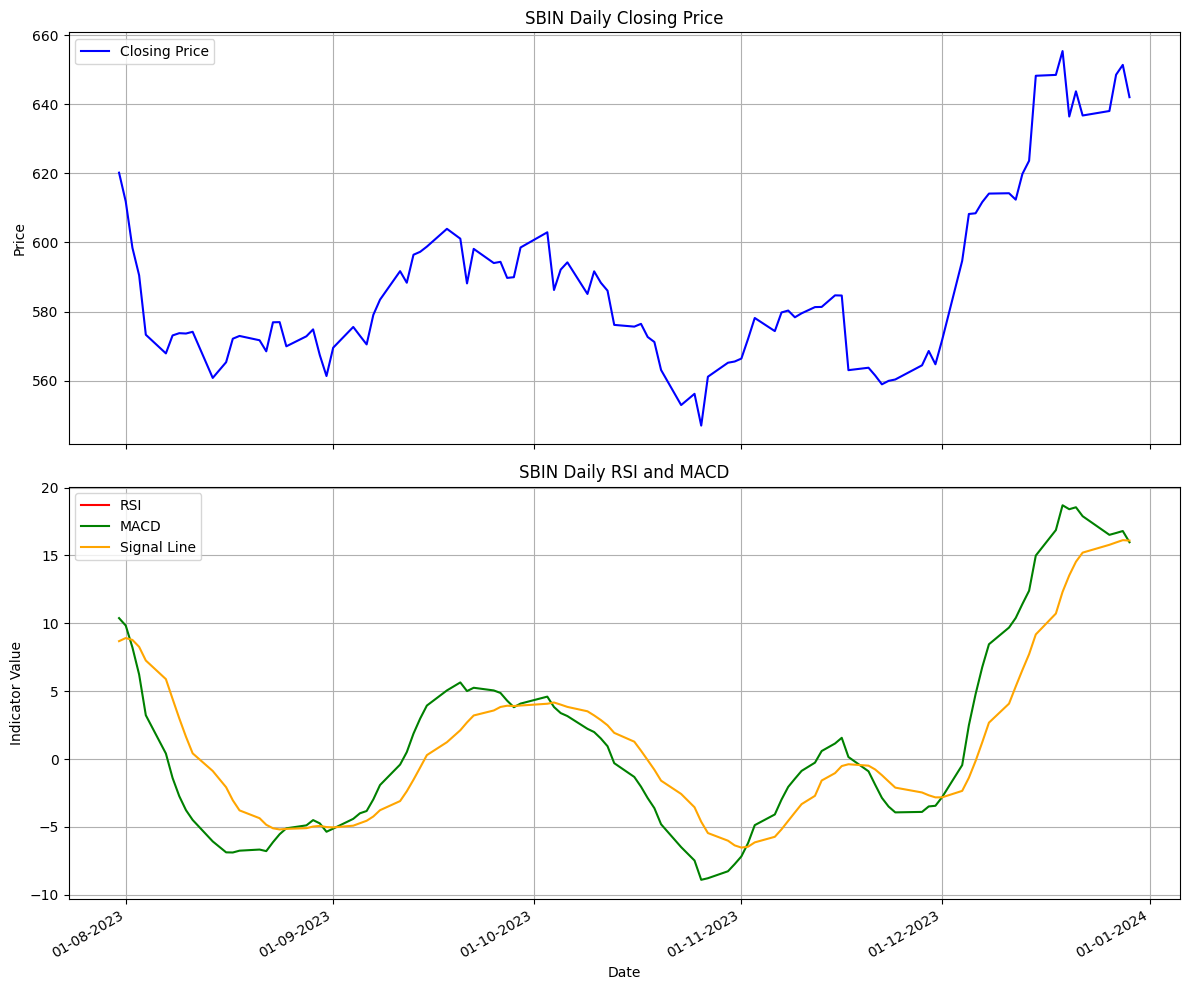

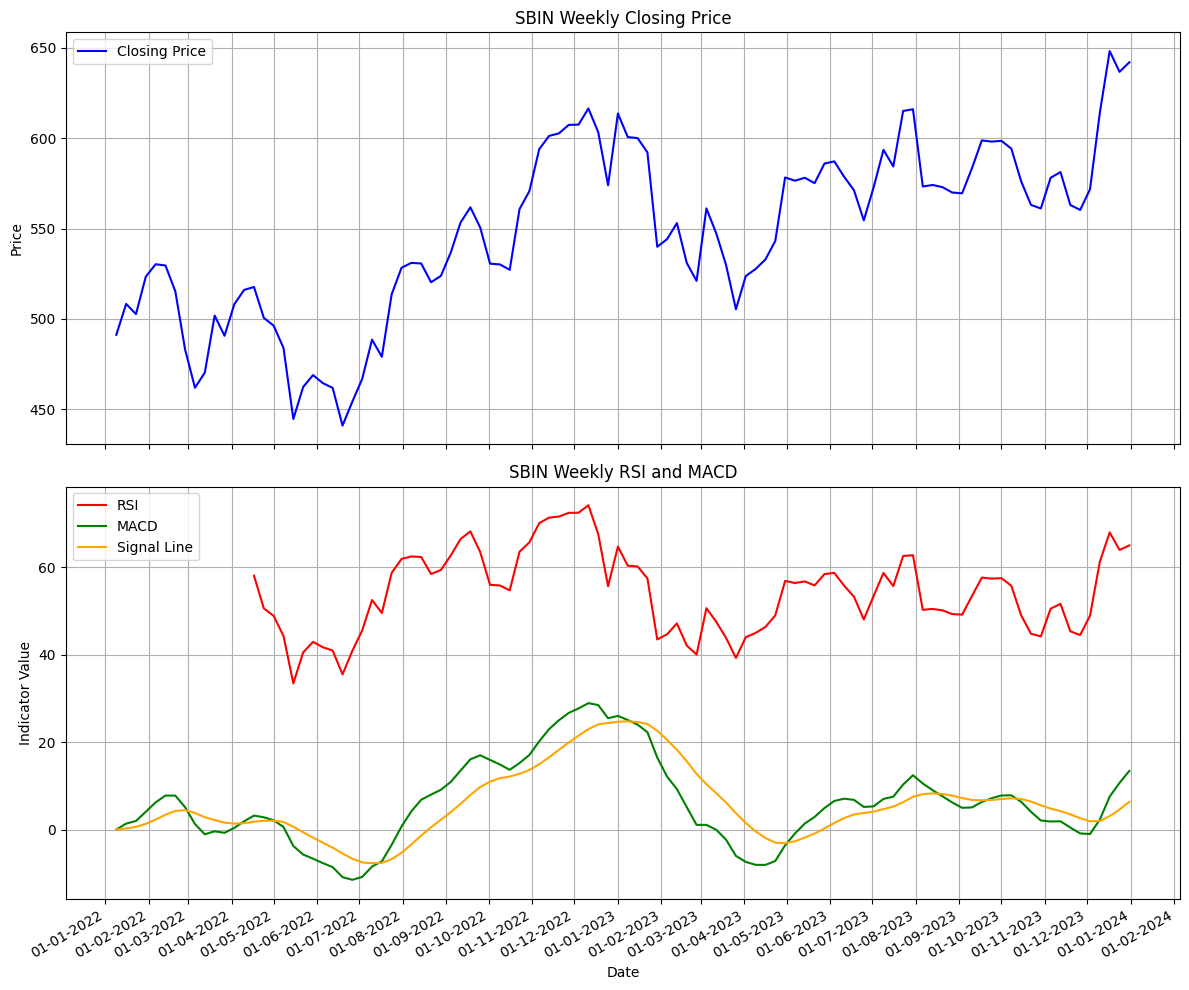

{'data': [{'_id': '63ce898eeb800e0007023eeb', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 64.7, 'CH_TRADE_LOW_PRICE': 63.15, 'CH_OPENING_PRICE': 64.25, 'CH_CLOSING_PRICE': 63.45, 'CH_LAST_TRADED_PRICE': 63.45, 'CH_PREVIOUS_CLS_PRICE': 63.9, 'CH_TOT_TRADED_QTY': 290726, 'CH_TOT_TRADED_VAL': 18574991.8, 'CH_52WEEK_HIGH_PRICE': 85.5, 'CH_52WEEK_LOW_PRICE': 41.75, 'CH_TOTAL_TRADES': 2568, 'CH_ISIN': 'INE332A01027', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.396Z', 'updatedAt': '2023-01-23T13:20:14.396Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 63.89, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a0f92', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 65.3, 'CH_TRADE_LOW_PRICE': 63.45, 'CH_OPENING_PRICE': 64.1, 'CH_CLOSING_PRICE': 63.9, 'CH_LAST_TRADED_PRICE': 63.65, 'CH_PREVIOUS_CLS_PRICE': 63.7, 'CH_TOT_TRADED_QTY': 331903, 

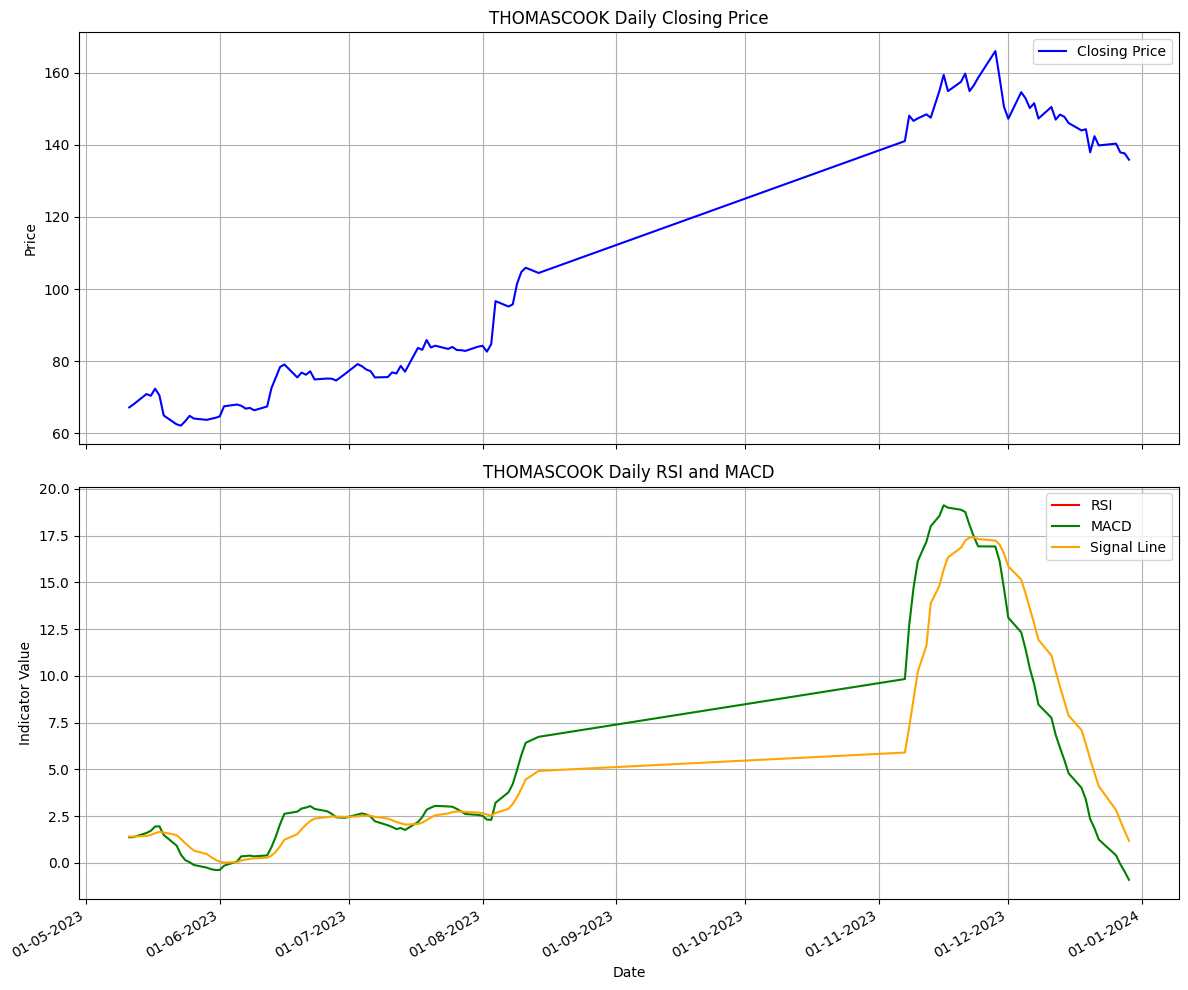

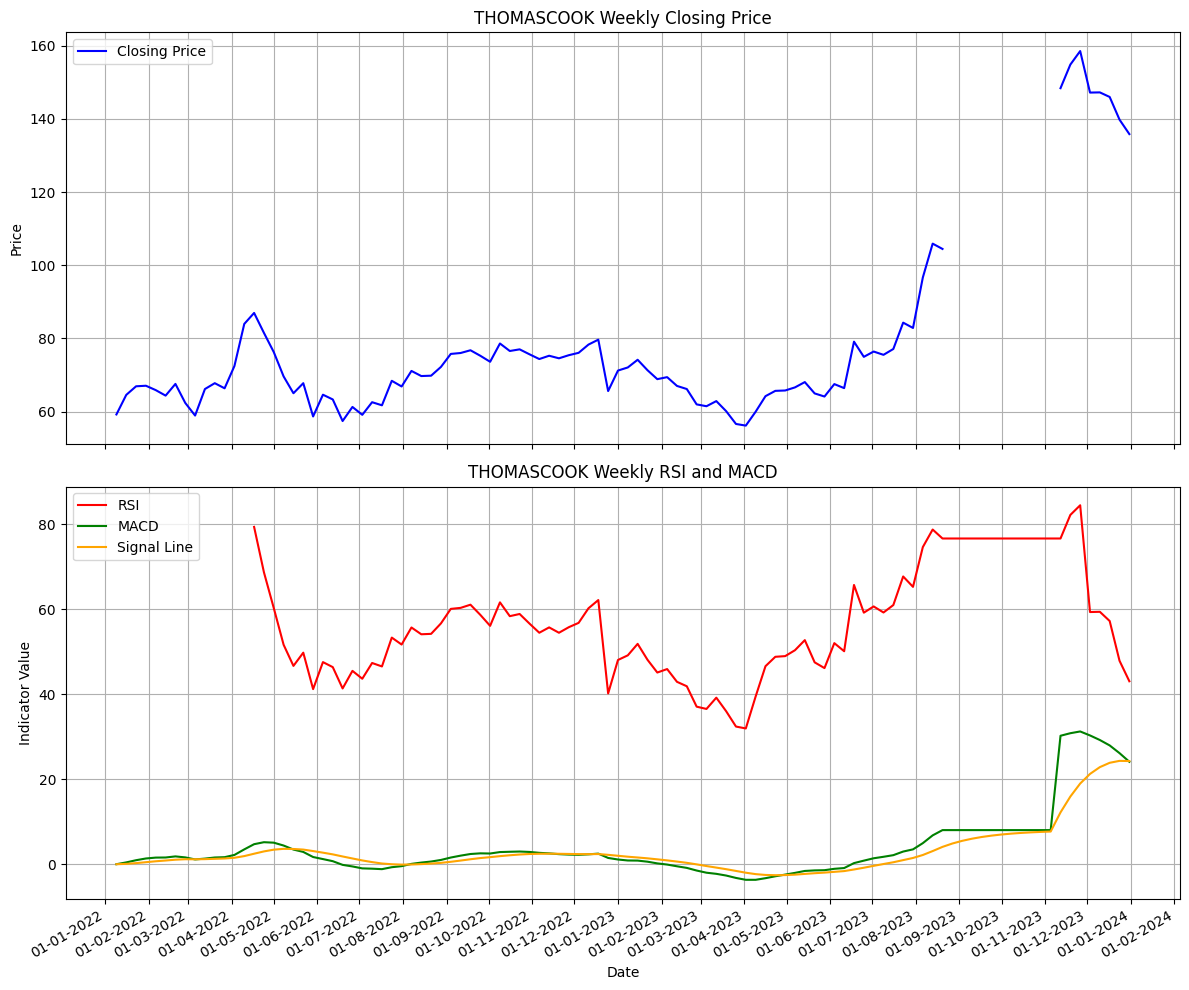

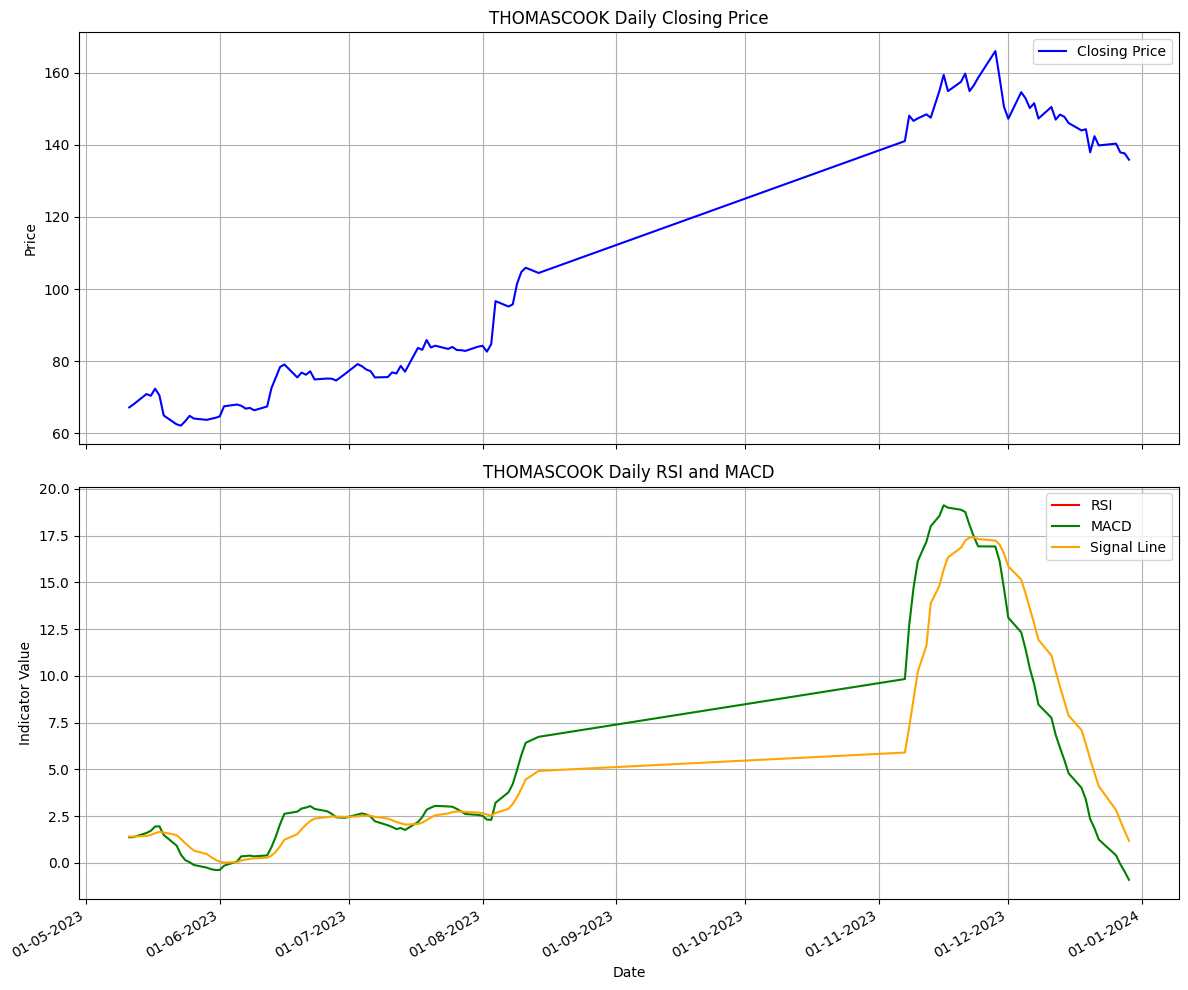

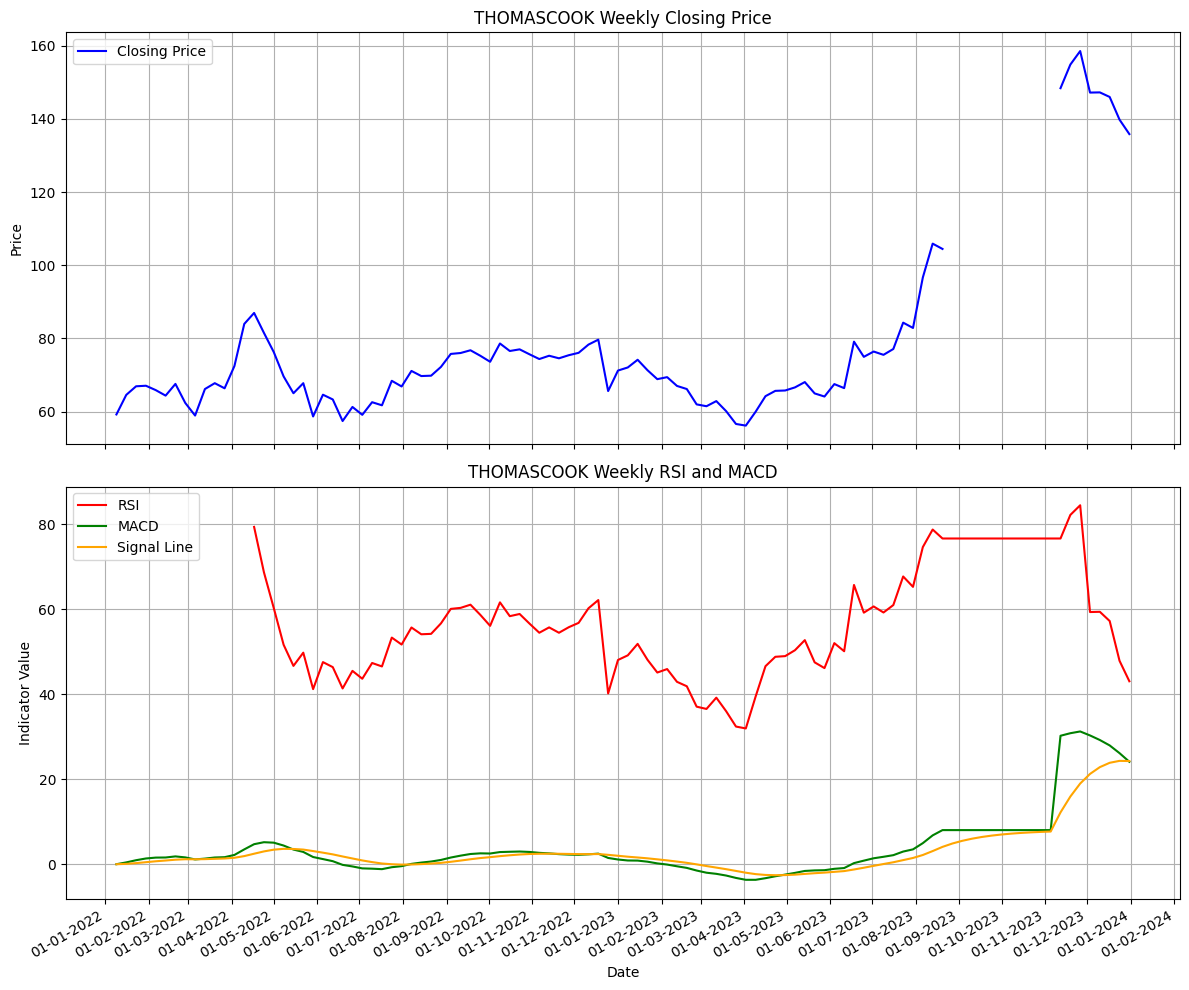

{'data': [{'_id': '63ce898feb800e00070245d3', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 129.1, 'CH_TRADE_LOW_PRICE': 106.1, 'CH_OPENING_PRICE': 108.15, 'CH_CLOSING_PRICE': 122.75, 'CH_LAST_TRADED_PRICE': 122.9, 'CH_PREVIOUS_CLS_PRICE': 107.6, 'CH_TOT_TRADED_QTY': 118621529, 'CH_TOT_TRADED_VAL': 14576896875.85, 'CH_52WEEK_HIGH_PRICE': 166.9, 'CH_52WEEK_LOW_PRICE': 52, 'CH_TOTAL_TRADES': 454648, 'CH_ISIN': 'INE814H01011', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:15.905Z', 'updatedAt': '2023-01-23T13:20:15.905Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 122.89, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce8980f1500d00079a16b8', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 109.85, 'CH_TRADE_LOW_PRICE': 106.5, 'CH_OPENING_PRICE': 109.2, 'CH_CLOSING_PRICE': 107.6, 'CH_LAST_TRADED_PRICE': 107.5, 'CH_PREVIOUS_CLS_PRICE': 108.15, 'CH_TOT_TRA

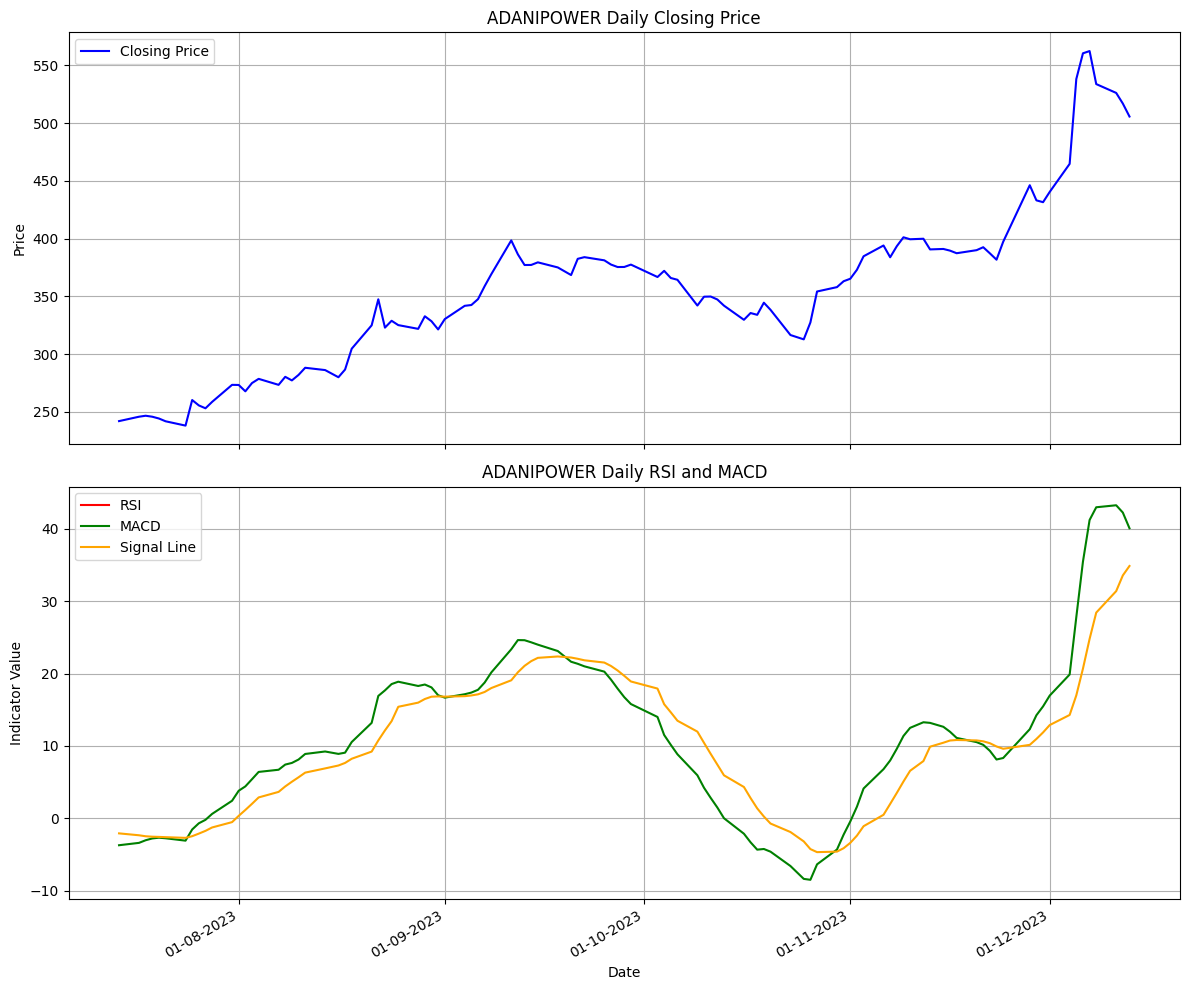

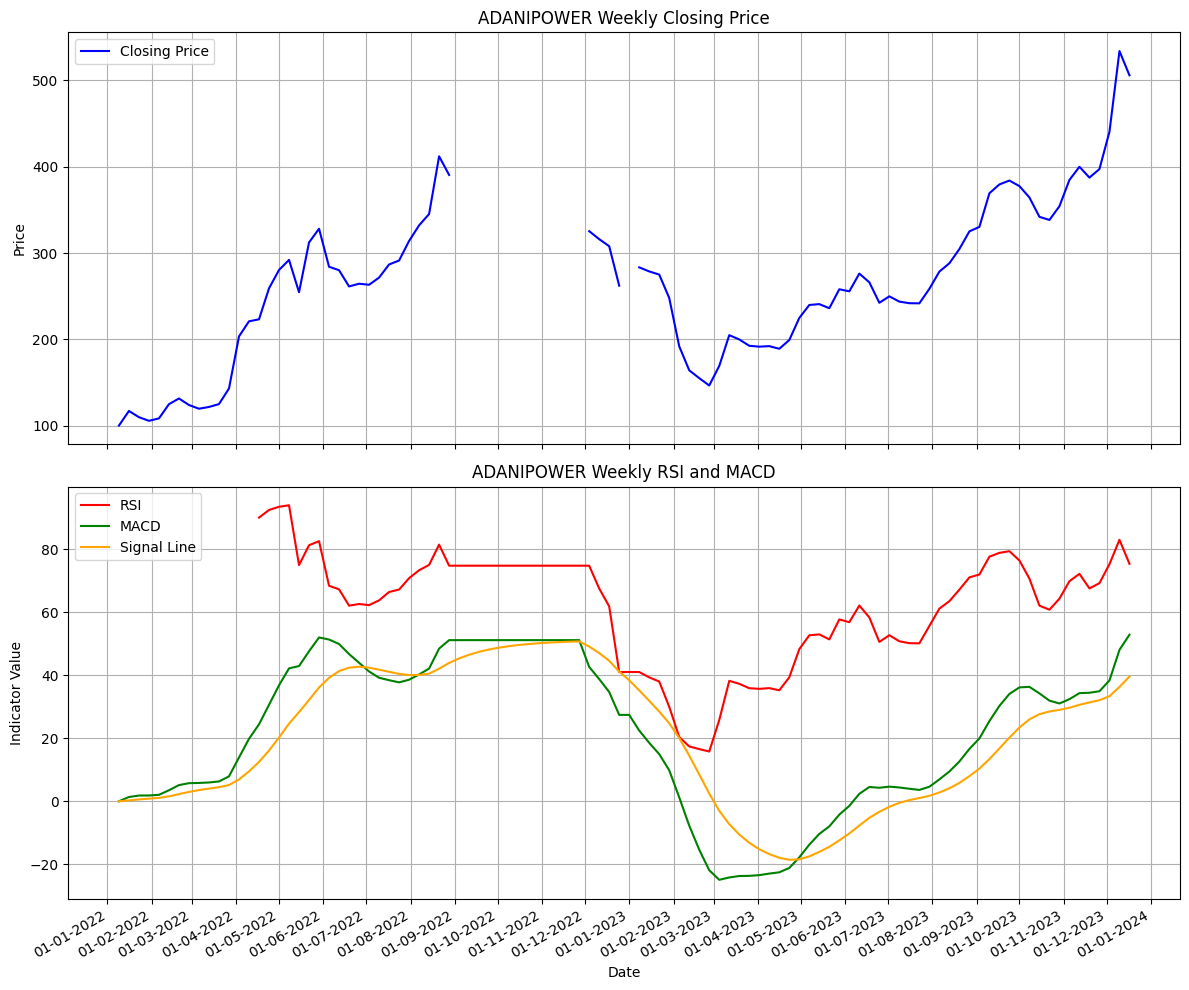

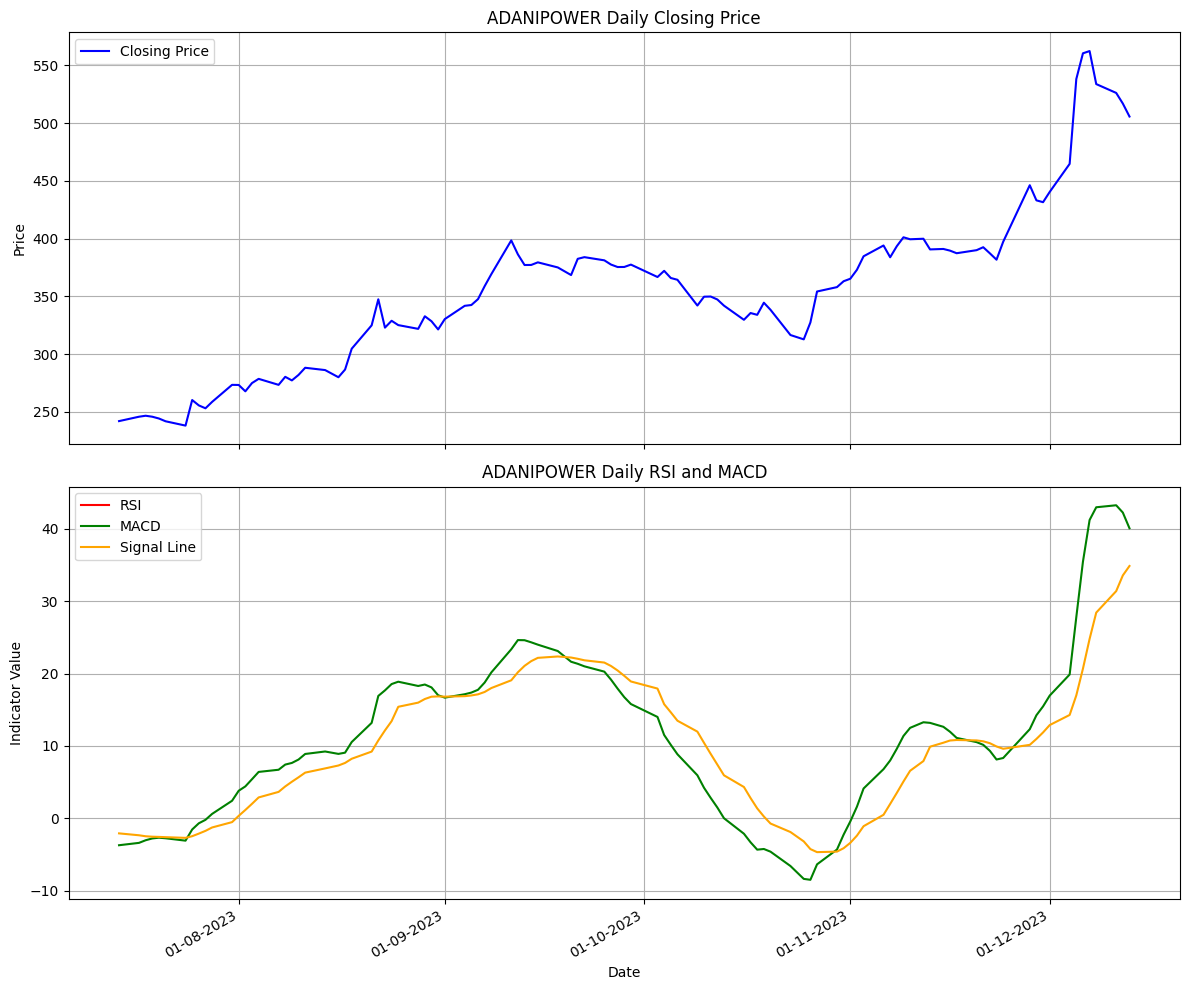

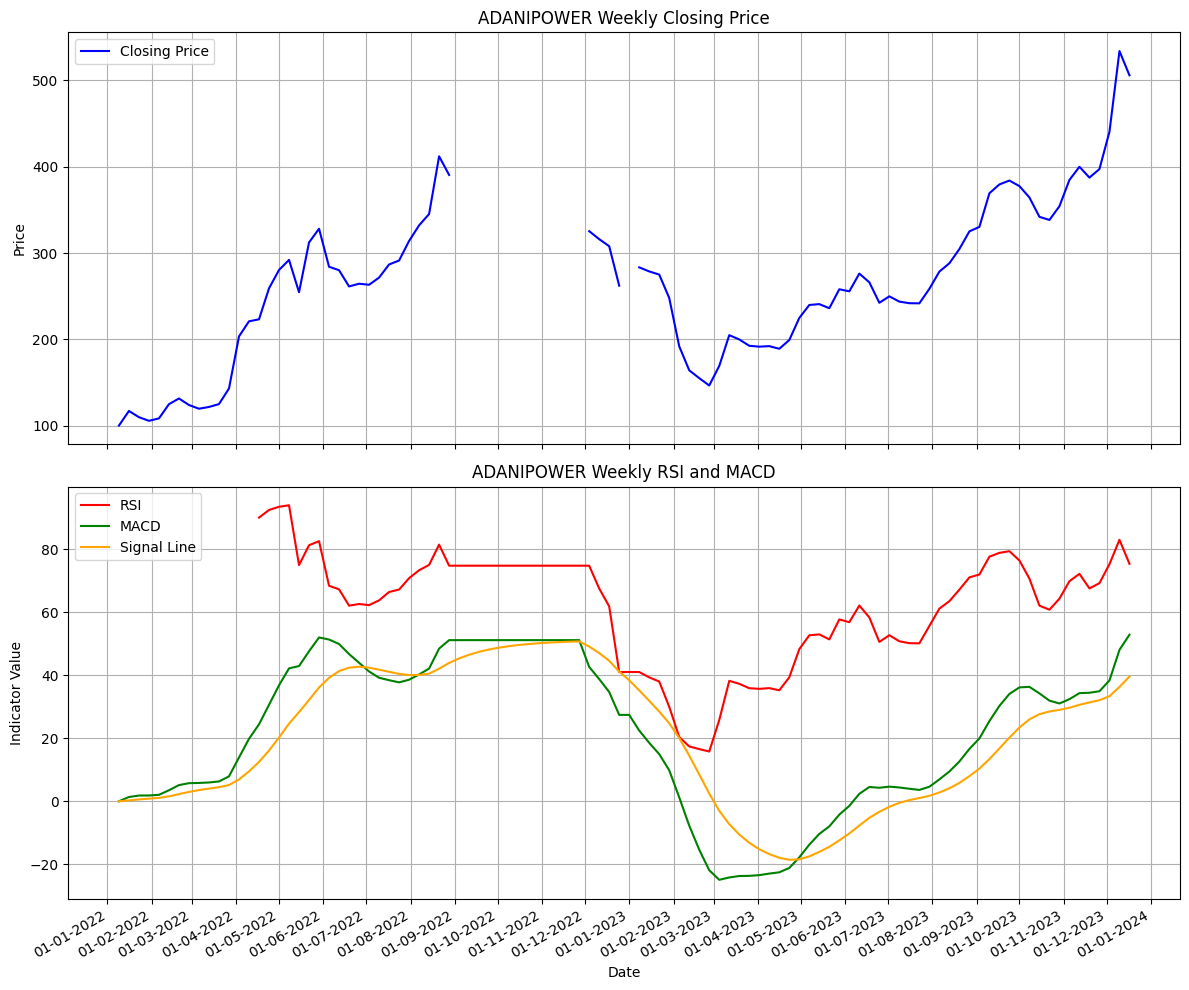

Plots saved to stockSymbols_daily_profile_104.pdf and stockSymbols_weekly_profile_104.pdf


In [ ]:
# 3.b multiple stocks
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import datetime
import pandas_ta as ta

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nse.equity_history(symbol, series, start_date, end_date)
    equity_df = pd.DataFrame(equity_data)
    equity_df['mTIMESTAMP'] = pd.to_datetime(equity_df['mTIMESTAMP'])
    equity_df = equity_df.set_index('mTIMESTAMP')
    equity_df = equity_df.sort_index()
    equity_df[['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']] = equity_df[
        ['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']].apply(pd.to_numeric, errors='coerce')
    equity_df = equity_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY'])
    return equity_df

# Function to calculate RSI
def calculate_rsi(data, length=14):
    equity_data['RSI'] = ta.rsi(equity_data['CH_CLOSING_PRICE'], length=14)
    return equity_data['RSI']

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to calculate weekly data
def calculate_weekly_data(equity_df):
    weekly_df = equity_df.resample('W').agg({
        'CH_OPENING_PRICE': 'first',
        'CH_TRADE_HIGH_PRICE': 'max',
        'CH_TRADE_LOW_PRICE': 'min',
        'CH_CLOSING_PRICE': 'last',
        'CH_TOT_TRADED_QTY': 'sum'
    })
    weekly_df['RSI'] = ta.rsi(weekly_df['CH_CLOSING_PRICE'])
    weekly_df['MACD'], weekly_df['Signal_Line'] = calculate_macd(weekly_df['CH_CLOSING_PRICE'])
    return weekly_df

# Function to save plots to PDF
def save_plots_to_pdf(daily_df, weekly_df, symbol, duration, pdf):
    # Plot daily data
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    ax[0].plot(daily_df.index, daily_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
    ax[0].set_title(f'{symbol} Daily Closing Price')
    ax[0].set_ylabel('Price')
    ax[0].legend()
    ax[0].grid()

    ax[1].plot(daily_df.index, daily_df['RSI'], label='RSI', color='red')
    ax[1].plot(daily_df.index, daily_df['MACD'], label='MACD', color='green')
    ax[1].plot(daily_df.index, daily_df['Signal_Line'], label='Signal Line', color='orange')
    ax[1].set_title(f'{symbol} Daily RSI and MACD')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Indicator Value')
    ax[1].legend()
    ax[1].grid()
    # Formatting the dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()


    plt.tight_layout()
    pdf.savefig(fig)
    plt.show()
    plt.close()

    # Plot weekly data
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    ax[0].plot(weekly_df.index, weekly_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
    ax[0].set_title(f'{symbol} Weekly Closing Price')
    ax[0].set_ylabel('Price')
    ax[0].legend()
    ax[0].grid()

    ax[1].plot(weekly_df.index, weekly_df['RSI'], label='RSI', color='red')
    ax[1].plot(weekly_df.index, weekly_df['MACD'], label='MACD', color='green')
    ax[1].plot(weekly_df.index, weekly_df['Signal_Line'], label='Signal Line', color='orange')
    ax[1].set_title(f'{symbol} Weekly RSI and MACD')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Indicator Value')
    ax[1].legend()
    ax[1].grid()
    # Formatting the dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    pdf.savefig(fig)
    plt.show()
    plt.close()

# Main function
def main():
    excel_file = input("Enter the Excel file path: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter the start date (dd-mm-yyyy): ")
    end_date = input("Enter the end date (dd-mm-yyyy): ")
    duration = int(input("Enter the duration (N): "))

    pdf_daily = PdfPages(f'stockSymbols_daily_profile_{duration}.pdf')
    pdf_weekly = PdfPages(f'stockSymbols_weekly_profile_{duration}.pdf')

    for symbol in stock_symbols:
        equity_df = fetch_equity_data(symbol, "EQ", start_date, end_date)

        # Calculate RSI and MACD for daily data
        equity_df['RSI'] = calculate_rsi(equity_df['CH_CLOSING_PRICE'])
        equity_df['MACD'], equity_df['Signal_Line'] = calculate_macd(equity_df['CH_CLOSING_PRICE'])

        # Remove duplicates based on index (mTIMESTAMP)
        equity_df = equity_df[~equity_df.index.duplicated(keep='first')]

        # Get last N days and N weeks data
        daily_df = equity_df.tail(duration)
        weekly_df = calculate_weekly_data(equity_df).tail(duration)

        # Remove duplicates from weekly data
        weekly_df = weekly_df[~weekly_df.index.duplicated(keep='first')]

        # Save plots to PDF
        save_plots_to_pdf(daily_df, weekly_df, symbol, duration, pdf_daily)
        save_plots_to_pdf(daily_df, weekly_df, symbol, duration, pdf_weekly)

    pdf_daily.close()
    pdf_weekly.close()

    print(f'Plots saved to stockSymbols_daily_profile_{duration}.pdf and stockSymbols_weekly_profile_{duration}.pdf')

if __name__ == "__main__":
    main()


In [ ]:
!pip install nsetools

In [ ]:
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nse.equity_history(symbol, series, start_date, end_date)
    equity_df = pd.DataFrame(equity_data)
    equity_df['mTIMESTAMP'] = pd.to_datetime(equity_df['mTIMESTAMP'])
    equity_df = equity_df.set_index('mTIMESTAMP')
    equity_df = equity_df.sort_index()
    equity_df[['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']] = equity_df[
        ['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY']].apply(pd.to_numeric, errors='coerce')
    equity_df = equity_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_TOT_TRADED_QTY'])
    return equity_df

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = pd.Series(data).diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to calculate weekly data
def calculate_weekly_data(equity_df):
    weekly_df = equity_df.resample('W').agg({
        'CH_OPENING_PRICE': 'first',
        'CH_TRADE_HIGH_PRICE': 'max',
        'CH_TRADE_LOW_PRICE': 'min',
        'CH_CLOSING_PRICE': 'last',
        'CH_TOT_TRADED_QTY': 'sum'
    })
    weekly_df['RSI'] = calculate_rsi(weekly_df['CH_CLOSING_PRICE'])
    weekly_df['MACD'], weekly_df['Signal_Line'] = calculate_macd(weekly_df['CH_CLOSING_PRICE'])
    return weekly_df

# Function to save data to Excel
def save_to_excel(daily_df, weekly_df, symbol, duration):
    with pd.ExcelWriter(f'{symbol}_N_Period_Profile_{duration}.xlsx') as writer:
        daily_df.to_excel(writer, sheet_name='Daily Data')
        weekly_df.to_excel(writer, sheet_name='Weekly Data')

# Main function
def main():
    symbol = input("Enter the symbol: ")
    series = "EQ"
    start_date = input("Enter the start date (dd-mm-yyyy): ")
    end_date = input("Enter the end date (dd-mm-yyyy): ")

    equity_df = fetch_equity_data(symbol, series, start_date, end_date)

    # Calculate RSI and MACD for daily data
    equity_df['RSI'] = calculate_rsi(equity_df['CH_CLOSING_PRICE'])
    equity_df['MACD'], equity_df['Signal_Line'] = calculate_macd(equity_df['CH_CLOSING_PRICE'])

    # Get last N days and N weeks data
    daily_df = equity_df.tail(duration)
    weekly_df = calculate_weekly_data(equity_df).tail(duration)

    # Save to Excel
    save_to_excel(daily_df, weekly_df, symbol, duration)

    print(f'Results saved to {symbol}_N_Period_Profile_{duration}.xlsx')

if __name__ == "__main__":
    main()


Enter the symbol: SBIN
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023


NameError: name 'duration' is not defined

In [ ]:
#RSI CROSSING n = 60
import pandas as pd
import nsepython
import pandas_ta as ta

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = equity_history(symbol, series, start_date, end_date)
    return pd.DataFrame(equity_data)

# Function to calculate RSI and find crossing values
def find_crossing_values(symbol, series, start_date, end_date, specific_value):
    equity_data = fetch_equity_data(symbol, series, start_date, end_date)

    # Calculate RSI
    equity_data['RSI'] = ta.rsi(equity_data['CH_CLOSING_PRICE'], length=14)


    # Find crossing values
    crossing_dates = equity_data[(equity_data['RSI'] > specific_value) & (equity_data['RSI'].shift(-1) < specific_value)]

    return crossing_dates

# Load Excel file with stock symbols
excel_file = '/content/Stocks.xlsx'
stock_data = pd.read_excel(excel_file)

# Input specific value, start date, and end date
specific_value = int(input("Enter the specific value for RSI crossing: "))
start_date = input("Enter the start date (dd-mm-yyyy): ")
end_date = input("Enter the end date (dd-mm-yyyy): ")

# Iterate over each stock symbol
for symbol in stock_data['Name']:
    crossing_dates = find_crossing_values(symbol, series, start_date, end_date, specific_value)

    # Print crossing dates for each symbol
    if not crossing_dates.empty:
        print(f"\nStock Symbol: {symbol}")
        print(crossing_dates[['mTIMESTAMP', 'RSI']])


Enter the specific value for RSI crossing: 60
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE': 527.75, 'CH_

In [ ]:
!pip install xlsxwriter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
with pd.ExcelWriter('RSI_Crossing_60.xlsx', engine='xlsxwriter') as excel_writer:
    # Iterate over each stock symbol
    for symbol in stock_data['Name']:
        crossing_dates = find_crossing_values(symbol, series, start_date, end_date, specific_value)

        # Print crossing dates for each symbol
        if not crossing_dates.empty:
            crossing_dates[['mTIMESTAMP', 'RSI']].to_excel(excel_writer, sheet_name=symbol, index=False)

{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE': 527.75, 'CH_OPENING_PRICE': 534.95, 'CH_CLOSING_PRICE': 535.25, 'CH_LAST_TRADED_PRICE': 536.3, 'CH_PREVIOUS_CLS_PRICE': 531.35, 'CH_TOT_TRADED_QTY':

In [ ]:
#8 SBIN stock of ADX, DI+, DI -
import pandas as pd
import nsepython
from ta.trend import ADXIndicator

# Fetch equity data
symbol = input( "Enter the symbol: ")
series = 'EQ'
start_date = input( "Enter the start date (dd-mm-yyyy): ")
end_date = input( "Enter the end date (dd-mm-yyyy): ")
equity_data = equity_history(symbol, series, start_date, end_date)


data = pd.DataFrame(equity_data)

# Calculate ADX, DI+ and DI-
adx_indicator = ADXIndicator(equity_data['CH_TRADE_HIGH_PRICE'], equity_data['CH_TRADE_LOW_PRICE'], equity_data['CH_CLOSING_PRICE'], window=14)
equity_data['ADX'] = adx_indicator.adx()
equity_data['DI+'] = adx_indicator.adx_pos()
equity_data['DI-'] = adx_indicator.adx_neg()

# Print or use the calculated values
print("ADX, DI+, DI- for", symbol)
print(equity_data[['mTIMESTAMP', 'ADX', 'DI+', 'DI-']])


Enter the symbol: SBIN
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
ADX, DI+, DI- for SBIN
      mTIMESTAMP        ADX        DI+        DI-
0    22-Dec-2023   0.000000   0.000000   0.000000
1    26-Dec-2023   0.000000   0.000000   0.000000
2    27-Dec-2023   0.000000   0.000000   0.000000
3    28-Dec-2023   0.000000   0.000000   0.000000
4    29-Dec-2023   0.000000   0.000000   0.000000
..           ...        ...        ...        ...
503  04-Feb-2022  11.936460  20.969708  20.412367
504  07-Feb-2022  11.389656  19.928893  18.292553
505  08-Feb-2022  10.802858  18.319992  19.521257
506  09-Feb-2022  10.257975  17.601996  18.756181
507  10-Feb-2022   9.961398  20.262204  17.930214

[508 rows x 4 columns]


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW

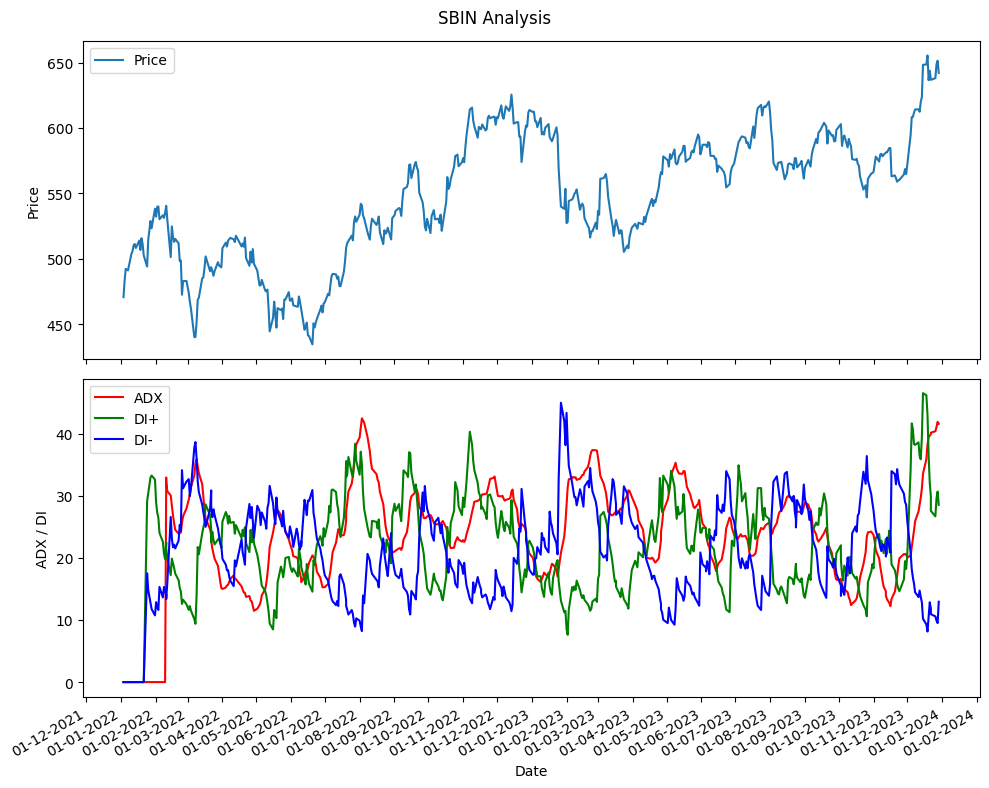

ADX, DI+, DI- for THOMASCOOK
                  ADX        DI+        DI-
mTIMESTAMP                                 
2022-01-03   0.000000   0.000000   0.000000
2022-01-04   0.000000   0.000000   0.000000
2022-01-05   0.000000   0.000000   0.000000
2022-01-06   0.000000   0.000000   0.000000
2022-01-07   0.000000   0.000000   0.000000
...               ...        ...        ...
2023-12-22  26.793880  14.439699  18.029308
2023-12-26  26.168524  13.420510  19.327973
2023-12-27  25.587836  12.529355  18.044548
2023-12-28  25.429741  11.905455  19.168943
2023-12-29  25.282939  11.569397  18.627857

[450 rows x 3 columns]


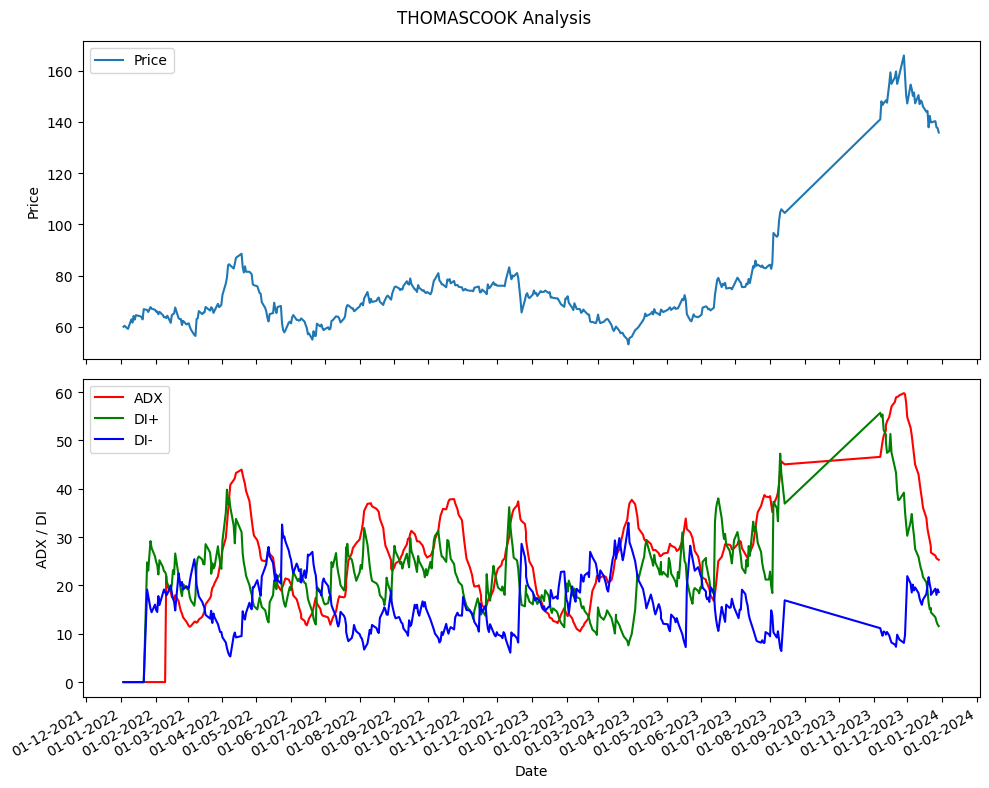

ADX, DI+, DI- for ADANIPOWER
                  ADX        DI+        DI-
mTIMESTAMP                                 
2022-01-03   0.000000   0.000000   0.000000
2022-01-04   0.000000   0.000000   0.000000
2022-01-05   0.000000   0.000000   0.000000
2022-01-06   0.000000   0.000000   0.000000
2022-01-07   0.000000   0.000000   0.000000
...               ...        ...        ...
2023-12-07  39.311976  49.567504   6.186986
2023-12-08  40.207008  43.342657  13.746339
2023-12-11  40.921910  40.759667  13.508542
2023-12-12  41.433201  39.038448  13.687715
2023-12-13  41.197927  36.856520  16.504839

[425 rows x 3 columns]


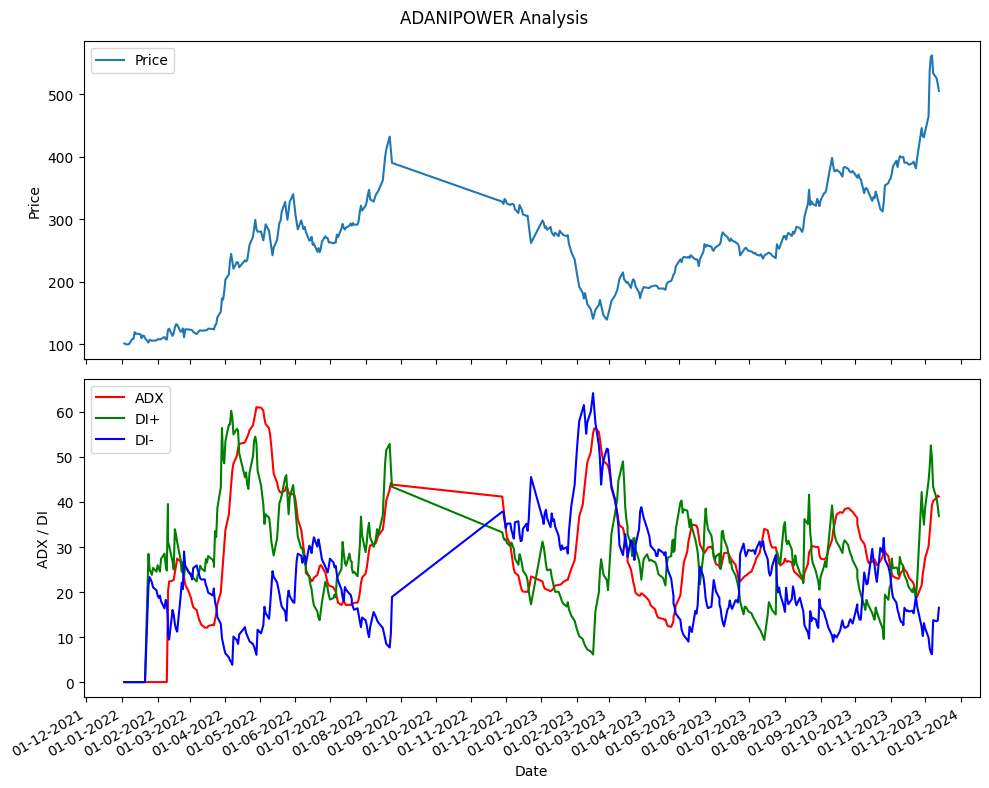

Results saved to ADX_DI_Data.xlsx and ADX_DI_Plots.pdf


In [ ]:
import pandas as pd
import nsepython
from ta.trend import ADXIndicator
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.dates as mdates

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nsepython.equity_history(symbol, series, start_date, end_date)
    data = pd.DataFrame(equity_data)
    data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
    data = data.sort_values(by='mTIMESTAMP')
    data.set_index('mTIMESTAMP', inplace=True)
    return data

# Function to calculate ADX, DI+, and DI-
def calculate_adx(data):
    adx_indicator = ADXIndicator(data['CH_TRADE_HIGH_PRICE'], data['CH_TRADE_LOW_PRICE'], data['CH_CLOSING_PRICE'], window=14)
    data['ADX'] = adx_indicator.adx()
    data['DI+'] = adx_indicator.adx_pos()
    data['DI-'] = adx_indicator.adx_neg()
    return data

# Main function
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter the start date (dd-mm-yyyy): ")
    end_date = input("Enter the end date (dd-mm-yyyy): ")

    pdf_filename = "ADX_DI_Plots.pdf"
    pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_filename)

    with pd.ExcelWriter('ADX_DI_Data.xlsx') as writer:
        for symbol in stock_symbols:
            data = fetch_equity_data(symbol, 'EQ', start_date, end_date)
            data = calculate_adx(data)

            # Print the ADX, DI+, DI- values
            print(f"ADX, DI+, DI- for {symbol}")
            print(data[['ADX', 'DI+', 'DI-']])

            # Save the data to Excel
            data[['ADX', 'DI+', 'DI-']].to_excel(writer, sheet_name=symbol)

            # Plotting
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
            fig.suptitle(f'{symbol} Analysis')

            ax1.plot(data.index, data['CH_CLOSING_PRICE'], label='Price')
            ax1.set_ylabel('Price')
            ax1.legend(loc='upper left')

            ax2.plot(data.index, data['ADX'], label='ADX', color='r')
            ax2.plot(data.index, data['DI+'], label='DI+', color='g')
            ax2.plot(data.index, data['DI-'], label='DI-', color='b')
            ax2.set_ylabel('ADX / DI')
            ax2.legend(loc='upper left')

            plt.xlabel('Date')
            #formatting
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
            plt.gcf().autofmt_xdate()
            plt.tight_layout()
            plt.show()

            pdf.savefig(fig)
            plt.close()

    pdf.close()
    print(f'Results saved to ADX_DI_Data.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


SBIN
01-01-2022
31-12-2023
                          _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
0    65857a7f1c7fd48aa7ecb4fc      SBIN        EQ              N   
1    658ac07e55487c5c282e52d6      SBIN        EQ              N   
2    658c11ff3dcac5b895a9ab2a      SBIN        EQ              N   
3    658d637e55a5f96115c518a5      SBIN        EQ              N   
4    658eb4ff59ecfd0253b31b8f      SBIN        EQ              N   
..                        ...       ...       ...            ...   
503  63ce8952c7307c0007d9feee      SBIN        EQ              N   
504  63ce8961ea62a9000775ff8e      SBIN        EQ              N   
505  63ce8971a34e360007d0d5fc      SBIN        EQ              N   
506  63ce897ff1500d00079a11a1      SBIN        EQ              N   
507  63ce898eeb800e00070240e5      SBIN        EQ              N   

     CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
0                 649.40              635.15            644.75   
1                 641.30

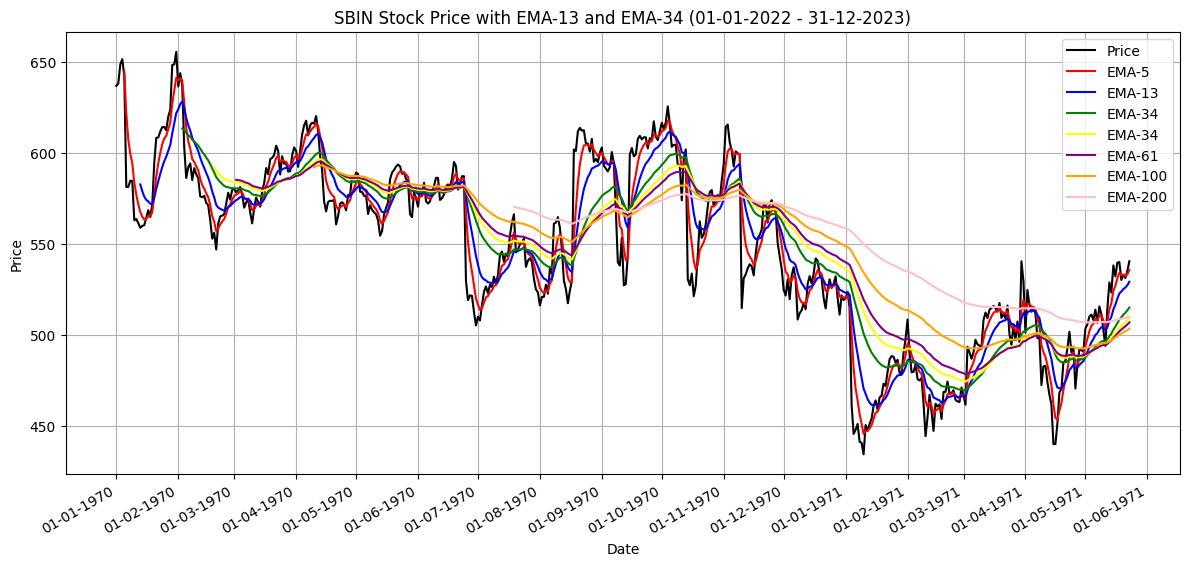

EMA-13 and EMA-34 plotted successfully!


In [ ]:
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def get_stock_data(symbol, series, start_date, end_date):
  """Retrieves equity data for a stock from NSE."""
  try:
    data = equity_history(symbol=symbol, series=series, start_date=start_date, end_date=end_date)
    df = pd.DataFrame(data)
    return df
  except (nsepython.NsepyException, ConnectionError) as e:
    print(f"Error retrieving data for {symbol}: {e}")
    return None

# Define symbols and series
stock_symbol = input()
benchmark_symbol = "NIFTY 50"  # Not used in this code
series = "EQ"

# Get user input for start and end dates (YYYY-MM-DD format)
start_date = input()
end_date = input()

# Retrieve stock data
stock_data = get_stock_data(stock_symbol, series, start_date, end_date)

if stock_data is None:
  exit(1)  # Exit if data retrieval failed

# Calculate EMA-13 and EMA-34
stock_data['EMA_5'] = stock_data['CH_CLOSING_PRICE'].ewm(span=5, min_periods=5).mean()
stock_data['EMA_13'] = stock_data['CH_CLOSING_PRICE'].ewm(span=13, min_periods=13).mean()
stock_data['EMA_20'] = stock_data['CH_CLOSING_PRICE'].ewm(span=20, min_periods=20).mean()
stock_data['EMA_34'] = stock_data['CH_CLOSING_PRICE'].ewm(span=34, min_periods=34).mean()
stock_data['EMA_50'] = stock_data['CH_CLOSING_PRICE'].ewm(span=50, min_periods=50).mean()
stock_data['EMA_61'] = stock_data['CH_CLOSING_PRICE'].ewm(span=61, min_periods=61).mean()
stock_data['EMA_100'] = stock_data['CH_CLOSING_PRICE'].ewm(span=100, min_periods=100).mean()
stock_data['EMA_200'] = stock_data['CH_CLOSING_PRICE'].ewm(span=200, min_periods=200).mean()
print(stock_data)

# Plot EMA-13 and EMA-34 against dates
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['CH_CLOSING_PRICE'], label='Price', color = 'black')
plt.plot(stock_data.index, stock_data['EMA_5'], label='EMA-5', color= 'red')
plt.plot(stock_data.index, stock_data['EMA_13'], label='EMA-13', color = 'blue')
plt.plot(stock_data.index, stock_data['EMA_34'], label='EMA-34', color= 'green')
plt.plot(stock_data.index, stock_data['EMA_50'], label='EMA-34', color= 'yellow')
plt.plot(stock_data.index, stock_data['EMA_61'], label='EMA-61', color= 'purple')
plt.plot(stock_data.index, stock_data['EMA_100'], label='EMA-100', color= 'orange')
plt.plot(stock_data.index, stock_data['EMA_200'], label='EMA-200', color= 'pink')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"SBIN Stock Price with EMA ({start_date} - {end_date})")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

#formatting the dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()



SBIN
01-01-2022
31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE': 527.75, 'CH_OPENING_PRICE': 534.95, 'CH_CLOSING_PRICE': 535.25, 'CH_LAST_TRADED_PRICE': 536.3, 'CH_PREVIOUS_CLS_PRICE': 5

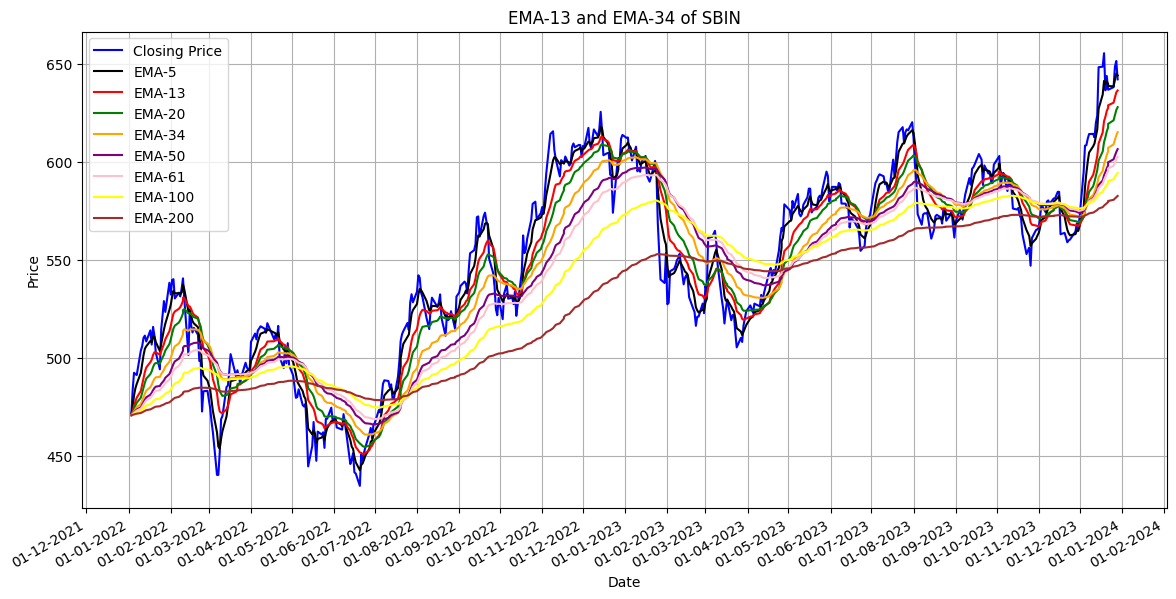

In [ ]:
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define symbols and series
stock_symbol = input()
series = "EQ"
start_date = input()
end_date = input()

# Fetch equity history for SBIN
stock_data = nse.equity_history(stock_symbol, series, start_date, end_date)
stock_df = pd.DataFrame(stock_data)
stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
stock_df = stock_df.sort_values(by='mTIMESTAMP')

# Convert necessary columns to numeric
stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')

# Drop rows with NaN values in key columns after conversion
stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE'])

# Calculate EMA-13
stock_df['EMA-5'] = stock_df['CH_CLOSING_PRICE'].ewm(span=5, adjust=False).mean()
stock_df['EMA-13'] = stock_df['CH_CLOSING_PRICE'].ewm(span=13, adjust=False).mean()
stock_df['EMA-20'] = stock_df['CH_CLOSING_PRICE'].ewm(span=20, adjust=False).mean()
stock_df['EMA-34'] = stock_df['CH_CLOSING_PRICE'].ewm(span=34, adjust=False).mean()
stock_df['EMA-50'] = stock_df['CH_CLOSING_PRICE'].ewm(span=50, adjust=False).mean()
stock_df['EMA-61'] = stock_df['CH_CLOSING_PRICE'].ewm(span=61, adjust=False).mean()
stock_df['EMA-100'] = stock_df['CH_CLOSING_PRICE'].ewm(span=100, adjust=False).mean()
stock_df['EMA-200'] = stock_df['CH_CLOSING_PRICE'].ewm(span=200, adjust=False).mean()

# Print the dataframe with EMA values
print(stock_df)


# Save the EMA values to an Excel file
output_file = 'SBIN_EMA13_EMA34.xlsx'
stock_df.to_excel(output_file, index=False)
print(f"EMA values have been saved to {output_file}")

# Print the dataframe with EMA values
print(stock_df)

# Plot EMA-13 and EMA-34 against dates
plt.figure(figsize=(14, 7))
plt.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-5'], label='EMA-5', color='black')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-13'], label='EMA-13', color='red')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-20'], label='EMA-20', color='green')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-34'], label='EMA-34', color='orange')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-50'], label='EMA-50', color='purple')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-61'], label='EMA-61', color='pink')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-100'], label='EMA-100', color='yellow')
plt.plot(stock_df['mTIMESTAMP'], stock_df['EMA-200'], label='EMA-200', color='brown')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'EMA-13 and EMA-34 of {stock_symbol}')
plt.legend()
plt.grid()

# Formatting date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
!pip install nsetools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nsetools import Nse
import nsepython
import matplotlib.backends.backend_pdf
from ta.momentum import RSIIndicator

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['CH_CLOSING_PRICE'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['CH_CLOSING_PRICE'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

def calculate_macd_signals(data):
    # Calculate MACD and Signal
    data['MACD'], data['Signal'] = calculate_macd(data)
    data['RSI'] = RSIIndicator(data['CH_CLOSING_PRICE'], window=14).rsi()

    # Calculate crossover points
    crossover_below_dates = []
    crossover_above_dates = []
    crossover_0line_below_dates = []

    prev_macd = data['MACD'].iloc[0]
    prev_signal = data['Signal'].iloc[0]

    for index, row in data.iterrows():
        if row['MACD'] > row['Signal'] and prev_macd <= prev_signal:
            crossover_below_dates.append((row.name, row['MACD']))
        elif row['MACD'] < row['Signal'] and prev_macd >= prev_signal:
            crossover_above_dates.append((row.name, row['MACD']))

        if row['MACD'] > 0 and prev_macd <= 0:
            crossover_0line_below_dates.append((row.name, row['MACD']))

        prev_macd = row['MACD']
        prev_signal = row['Signal']

    return crossover_below_dates, crossover_above_dates, crossover_0line_below_dates

def fetch_equity_data(symbol, start_date, end_date):
    nse = Nse()
    equity_data = equity_history(symbol, start=start_date, end=end_date)
    data = pd.DataFrame(equity_data['data'])
    data['mTIMESTAMP'] = pd.to_datetime(data['date'])
    data = data.sort_values(by='mTIMESTAMP')
    data.set_index('mTIMESTAMP', inplace=True)
    return data

def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter the start date (yyyy-mm-dd): ")
    end_date = input("Enter the end date (yyyy-mm-dd): ")

    pdf_filename = "MACD_Signal_Crossovers.pdf"
    pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_filename)

    with pd.ExcelWriter('MACD_Signal_Crossovers.xlsx') as writer:
        dummy_sheet_added = False  # Flag to check if at least one sheet is added

        for symbol in stock_symbols:
            try:
                data = fetch_equity_data(symbol, start_date, end_date)

                if data.empty or len(data) < 30:
                    print(f"Not enough data for symbol: {symbol}")
                    continue

                crossover_below, crossover_above, crossover_0line_below = calculate_macd_signals(data)

                if not crossover_below and not crossover_above and not crossover_0line_below:
                    print(f"No significant crossovers for symbol: {symbol}")
                    continue

                print(f"Dates when MACD crossed Signal from below (bullish crossover) for {symbol}:")
                print(crossover_below)
                print(f"Dates when MACD crossed Signal from above (bearish crossover) for {symbol}:")
                print(crossover_above)
                print(f"Dates when MACD crossed 0-Line from below for {symbol}:")
                print(crossover_0line_below)

                result_df = pd.DataFrame({
                    'Bullish Crossover Dates': pd.Series([d[0] for d in crossover_below]),
                    'Bearish Crossover Dates': pd.Series([d[0] for d in crossover_above]),
                    '0-Line Crossover Dates': pd.Series([d[0] for d in crossover_0line_below])
                })
                result_df.to_excel(writer, sheet_name=symbol, index=False)
                dummy_sheet_added = True  # Mark that at least one sheet is added

                # Plotting for the last 30 days
                last_30_days = data.tail(30)
                for case, dates in [
                    ('Bullish Crossover', crossover_below),
                    ('Bearish Crossover', crossover_above),
                    ('0-Line Crossover', crossover_0line_below)
                ]:
                    case_dates = [d[0] for d in dates if d[0] in last_30_days.index]
                    if not case_dates:
                        continue

                    fig, ax = plt.subplots()
                    ax.plot(last_30_days.index, last_30_days['CH_CLOSING_PRICE'], label='Price', color='blue')
                    ax.plot(last_30_days.index, last_30_days['MACD'], label='MACD', color='red')
                    ax.plot(last_30_days.index, last_30_days['Signal'], label='Signal', color='green')
                    ax.plot(last_30_days.index, last_30_days['RSI'], label='RSI', color='purple')
                    for date in case_dates:
                        ax.axvline(date, linestyle='--', color='grey', alpha=0.7)
                    ax.set_title(f'{symbol} - {case}')
                    ax.legend()
                    pdf.savefig(fig)
                    plt.close()

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Ensure at least one sheet is visible
        if not dummy_sheet_added:
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to MACD_Signal_Crossovers.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter the start date (yyyy-mm-dd): 01-01-2022
Enter the end date (yyyy-mm-dd): 31-12-2023
Error processing symbol SBIN: equity_history() got an unexpected keyword argument 'start'
Error processing symbol THOMASCOOK: equity_history() got an unexpected keyword argument 'start'
Error processing symbol ADANIPOWER: equity_history() got an unexpected keyword argument 'start'
Results saved to MACD_Signal_Crossovers.xlsx and MACD_Signal_Crossovers.pdf
